In [2]:
import os, sys
import csv
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import seaborn as sns
import copy
%matplotlib inline
sns.set_style("darkgrid", {"grid.linewidth": .5, "axes.facecolor": ".9"})
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime


/home/atproofer/anaconda3/lib/python3.5/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension as a python package.
  "as a python package.", UserWarning)


Installed autotime.py. To use it, type:
  %load_ext autotime


In [3]:
from sklearn import ensemble

time: 563 ms


In [4]:
df1 = pd.read_csv('swissmetro.dat', delimiter = '\t')

time: 152 ms


In [5]:
df1

,GROUP,SURVEY,SP,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,...,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE
0,2,0,1,1,1,0,1,1,0,3,...,112,48,120,63,52,20,0,117,65,2
1,2,0,1,1,1,0,1,1,0,3,...,103,48,30,60,49,10,0,117,84,2
2,2,0,1,1,1,0,1,1,0,3,...,130,48,60,67,58,30,0,117,52,2
3,2,0,1,1,1,0,1,1,0,3,...,103,40,30,63,52,20,0,72,52,2
4,2,0,1,1,1,0,1,1,0,3,...,130,36,60,63,42,20,0,90,84,2
5,2,0,1,1,1,0,1,1,0,3,...,112,36,120,60,49,10,0,90,52,2
6,2,0,1,1,1,0,1,1,0,3,...,103,48,120,67,58,10,0,72,65,2
7,2,0,1,1,1,0,1,1,0,3,...,103,36,30,67,43,30,0,90,65,1
8,2,0,1,1,1,0,1,1,0,3,...,130,40,60,60,46,10,0,72,65,2
9,2,0,1,2,1,0,1,1,1,2,...,184,62,120,76,70,20,0,0,0,2


time: 124 ms


In [6]:
df1.describe()

,GROUP,SURVEY,SP,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,...,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE
count,10728.000000,10728.000000,10728.0,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,...,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000
mean,2.630034,0.630034,1.0,596.500000,2.914430,0.470638,2.888423,1.493289,0.678691,2.898490,...,166.626025,514.335477,70.100671,87.466350,670.340697,20.020507,0.118568,123.795209,78.742077,2.152778
std,0.482818,0.482818,0.0,344.116678,1.147443,0.499160,2.191100,0.708293,0.603388,1.031726,...,77.353284,1088.931881,37.431633,53.550371,1441.594614,8.161895,0.323295,88.710743,55.263663,0.632293
min,2.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,31.000000,4.000000,30.000000,8.000000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.0,298.750000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,109.000000,58.000000,30.000000,55.000000,70.000000,10.000000,0.000000,70.000000,40.000000,2.000000
50%,3.000000,1.000000,1.0,596.500000,3.000000,0.000000,3.000000,1.000000,1.000000,3.000000,...,157.000000,94.000000,60.000000,78.000000,111.000000,20.000000,0.000000,120.000000,76.000000,2.000000
75%,3.000000,1.000000,1.0,894.250000,3.250000,1.000000,3.000000,2.000000,1.000000,4.000000,...,209.000000,170.000000,120.000000,109.000000,209.000000,30.000000,0.000000,176.000000,112.000000,3.000000
max,3.000000,1.000000,1.0,1192.000000,9.000000,1.000000,10.000000,3.000000,3.000000,6.000000,...,1049.000000,5040.000000,120.000000,796.000000,6720.000000,30.000000,1.000000,1560.000000,520.000000,3.000000


time: 92.2 ms


The session count is given by ID

In [6]:
df1.head()

,GROUP,SURVEY,SP,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,...,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE
0,2,0,1,1,1,0,1,1,0,3,...,112,48,120,63,52,20,0,117,65,2
1,2,0,1,1,1,0,1,1,0,3,...,103,48,30,60,49,10,0,117,84,2
2,2,0,1,1,1,0,1,1,0,3,...,130,48,60,67,58,30,0,117,52,2
3,2,0,1,1,1,0,1,1,0,3,...,103,40,30,63,52,20,0,72,52,2
4,2,0,1,1,1,0,1,1,0,3,...,130,36,60,63,42,20,0,90,84,2


time: 58.4 ms


In [7]:
max(df1['ID'])

1192

time: 11.8 ms


In [177]:
def build_dict(xs):
    d = {}
    for x in xs:
        if not(x in d.keys()):
            d[x] = []
    return d


time: 6.78 ms


In [178]:
d = build_dict(df1['ID'])

time: 17.8 ms


In [9]:
len(d)

1192

time: 5.49 ms


Why does description paper say only 470 were interviewed?

--> 750 w/ license plate observations by mail, and 441 on board (?)

In [10]:
750+441

1191

time: 6.16 ms


For car owners, option of car, else only rail or swissmetro; 

In [11]:
df1.columns

Index(['GROUP', 'SURVEY', 'SP', 'ID', 'PURPOSE', 'FIRST', 'TICKET', 'WHO',
       'LUGGAGE', 'AGE', 'MALE', 'INCOME', 'GA', 'ORIGIN', 'DEST', 'TRAIN_AV',
       'CAR_AV', 'SM_AV', 'TRAIN_TT', 'TRAIN_CO', 'TRAIN_HE', 'SM_TT', 'SM_CO',
       'SM_HE', 'SM_SEATS', 'CAR_TT', 'CAR_CO', 'CHOICE'],
      dtype='object')

time: 5.64 ms


In [12]:
df1.columns

Index(['GROUP', 'SURVEY', 'SP', 'ID', 'PURPOSE', 'FIRST', 'TICKET', 'WHO',
       'LUGGAGE', 'AGE', 'MALE', 'INCOME', 'GA', 'ORIGIN', 'DEST', 'TRAIN_AV',
       'CAR_AV', 'SM_AV', 'TRAIN_TT', 'TRAIN_CO', 'TRAIN_HE', 'SM_TT', 'SM_CO',
       'SM_HE', 'SM_SEATS', 'CAR_TT', 'CAR_CO', 'CHOICE'],
      dtype='object')

time: 7.81 ms


In [13]:
df1.describe()

,GROUP,SURVEY,SP,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,...,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE
count,10728.000000,10728.000000,10728.0,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,...,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000
mean,2.630034,0.630034,1.0,596.500000,2.914430,0.470638,2.888423,1.493289,0.678691,2.898490,...,166.626025,514.335477,70.100671,87.466350,670.340697,20.020507,0.118568,123.795209,78.742077,2.152778
std,0.482818,0.482818,0.0,344.116678,1.147443,0.499160,2.191100,0.708293,0.603388,1.031726,...,77.353284,1088.931881,37.431633,53.550371,1441.594614,8.161895,0.323295,88.710743,55.263663,0.632293
min,2.000000,0.000000,1.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,31.000000,4.000000,30.000000,8.000000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.0,298.750000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,109.000000,58.000000,30.000000,55.000000,70.000000,10.000000,0.000000,70.000000,40.000000,2.000000
50%,3.000000,1.000000,1.0,596.500000,3.000000,0.000000,3.000000,1.000000,1.000000,3.000000,...,157.000000,94.000000,60.000000,78.000000,111.000000,20.000000,0.000000,120.000000,76.000000,2.000000
75%,3.000000,1.000000,1.0,894.250000,3.250000,1.000000,3.000000,2.000000,1.000000,4.000000,...,209.000000,170.000000,120.000000,109.000000,209.000000,30.000000,0.000000,176.000000,112.000000,3.000000
max,3.000000,1.000000,1.0,1192.000000,9.000000,1.000000,10.000000,3.000000,3.000000,6.000000,...,1049.000000,5040.000000,120.000000,796.000000,6720.000000,30.000000,1.000000,1560.000000,520.000000,3.000000


time: 137 ms


swissmetro dataset only 750KB

(array([ 3969.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6759.]),
 array([ 2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ]),
 <a list of 10 Patch objects>)

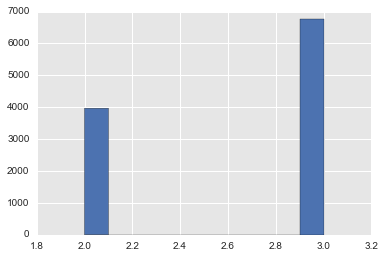

time: 807 ms


In [14]:
plt.hist(df1['GROUP'])

In [15]:
df1['GROUP'].value_counts()

3    6759
2    3969
Name: GROUP, dtype: int64

time: 20 ms


In [15]:
df1[df1['GROUP']==2]['SURVEY'].value_counts()

0    3969
Name: SURVEY, dtype: int64

time: 22.7 ms


In [16]:
df1[df1['GROUP']==3]['SURVEY'].value_counts()

1    6759
Name: SURVEY, dtype: int64

time: 10 ms


Group is equivalent to survey

In [16]:
df1.drop('GROUP', axis = 1, inplace = True)

time: 5.33 ms


In [17]:
df1.drop('TRAIN_AV', axis =1, inplace = True)

time: 5.9 ms


In [18]:
df1['MALE'].value_counts()

1    8046
0    2682
Name: MALE, dtype: int64

time: 11.9 ms


In [19]:
df1['SP'].value_counts()

1    10728
Name: SP, dtype: int64

time: 11.1 ms


In [20]:
df1.drop('SP', axis =1, inplace = True)

time: 5.77 ms


'FIRST' is first class traveler

In [21]:
df1['FIRST'].value_counts()

0    5679
1    5049
Name: FIRST, dtype: int64

time: 7.97 ms


In [22]:
for c in df1.columns:
    print(c)
    print(df1[c].value_counts())

SURVEY
1    6759
0    3969
Name: SURVEY, dtype: int64
ID
1191    9
746     9
762     9
770     9
778     9
786     9
794     9
802     9
810     9
818     9
826     9
834     9
842     9
850     9
858     9
866     9
874     9
754     9
738     9
594     9
730     9
610     9
618     9
626     9
634     9
642     9
650     9
658     9
666     9
674     9
       ..
493     9
501     9
509     9
517     9
525     9
533     9
541     9
549     9
557     9
565     9
573     9
453     9
445     9
437     9
365     9
317     9
325     9
333     9
341     9
349     9
357     9
373     9
429     9
381     9
389     9
397     9
405     9
413     9
421     9
8       9
Name: ID, dtype: int64
PURPOSE
3    5193
4    2304
1    1575
2    1278
7     144
5     144
6      63
9      18
8       9
Name: PURPOSE, dtype: int64
FIRST
0    5679
1    5049
Name: FIRST, dtype: int64
TICKET
1     4680
3     3402
6     1350
7      315
8      297
5      234
2      207
10     144
4       99
Name: TICKET, dtype: int64

In [23]:
#df1.drop('TRAIN_AV', axis =1, inplace = True)
df1.drop('SM_AV', axis =1, inplace = True)

time: 5.31 ms


For multioutput - could do probability allocation ... and take the greatest of the set, or could do proper one-versus-all prediction.  Should look back at previous prediction system?

In [24]:
df1.columns

Index(['SURVEY', 'ID', 'PURPOSE', 'FIRST', 'TICKET', 'WHO', 'LUGGAGE', 'AGE',
       'MALE', 'INCOME', 'GA', 'ORIGIN', 'DEST', 'CAR_AV', 'TRAIN_TT',
       'TRAIN_CO', 'TRAIN_HE', 'SM_TT', 'SM_CO', 'SM_HE', 'SM_SEATS', 'CAR_TT',
       'CAR_CO', 'CHOICE'],
      dtype='object')

time: 5.51 ms


In [25]:
df1[df1['SURVEY']==1]['LUGGAGE'].value_counts()

0    3510
1    3249
Name: LUGGAGE, dtype: int64

time: 19.5 ms


In [26]:
df1[df1['SURVEY']==0]['LUGGAGE'].value_counts()

1    3249
0     459
3     261
Name: LUGGAGE, dtype: int64

time: 9.71 ms


Can have several pieces of luggage on the train, not so in car

In [27]:
df1['CHOICE'].value_counts()

2    6216
3    3080
1    1423
0       9
Name: CHOICE, dtype: int64

time: 8.18 ms


Maybe drop those nine

Need to remember to split by session.  And use the same split they did?

In [28]:
df1.loc[:7,:]

,SURVEY,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,MALE,INCOME,...,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE
0,0,1,1,0,1,1,0,3,0,2,...,112,48,120,63,52,20,0,117,65,2
1,0,1,1,0,1,1,0,3,0,2,...,103,48,30,60,49,10,0,117,84,2
2,0,1,1,0,1,1,0,3,0,2,...,130,48,60,67,58,30,0,117,52,2
3,0,1,1,0,1,1,0,3,0,2,...,103,40,30,63,52,20,0,72,52,2
4,0,1,1,0,1,1,0,3,0,2,...,130,36,60,63,42,20,0,90,84,2
5,0,1,1,0,1,1,0,3,0,2,...,112,36,120,60,49,10,0,90,52,2
6,0,1,1,0,1,1,0,3,0,2,...,103,48,120,67,58,10,0,72,65,2
7,0,1,1,0,1,1,0,3,0,2,...,103,36,30,67,43,30,0,90,65,1


time: 43.1 ms


Choice - 0 unknown - 1 Train - 2 SM - 3 Car

Nice to know that the unknowns in choice are so few

In [43]:
df1[df1['CAR_AV']==0]['CHOICE'].value_counts()

2    1039
1     644
Name: CHOICE, dtype: int64

time: 17 ms


Good to know that it excludes car

In [29]:
df1[df1['CAR_AV']==1]['CHOICE'].value_counts()

2    5177
3    3080
1     779
0       9
Name: CHOICE, dtype: int64

time: 15.3 ms


Can we do a scattermatrix with this data?

In [30]:
df1.columns

Index(['SURVEY', 'ID', 'PURPOSE', 'FIRST', 'TICKET', 'WHO', 'LUGGAGE', 'AGE',
       'MALE', 'INCOME', 'GA', 'ORIGIN', 'DEST', 'CAR_AV', 'TRAIN_TT',
       'TRAIN_CO', 'TRAIN_HE', 'SM_TT', 'SM_CO', 'SM_HE', 'SM_SEATS', 'CAR_TT',
       'CAR_CO', 'CHOICE'],
      dtype='object')

time: 6.14 ms


In [31]:
sc_feats = ['SURVEY', 'AGE','INCOME','TRAIN_TT','SM_TT','CAR_TT','CHOICE']

time: 2.16 ms


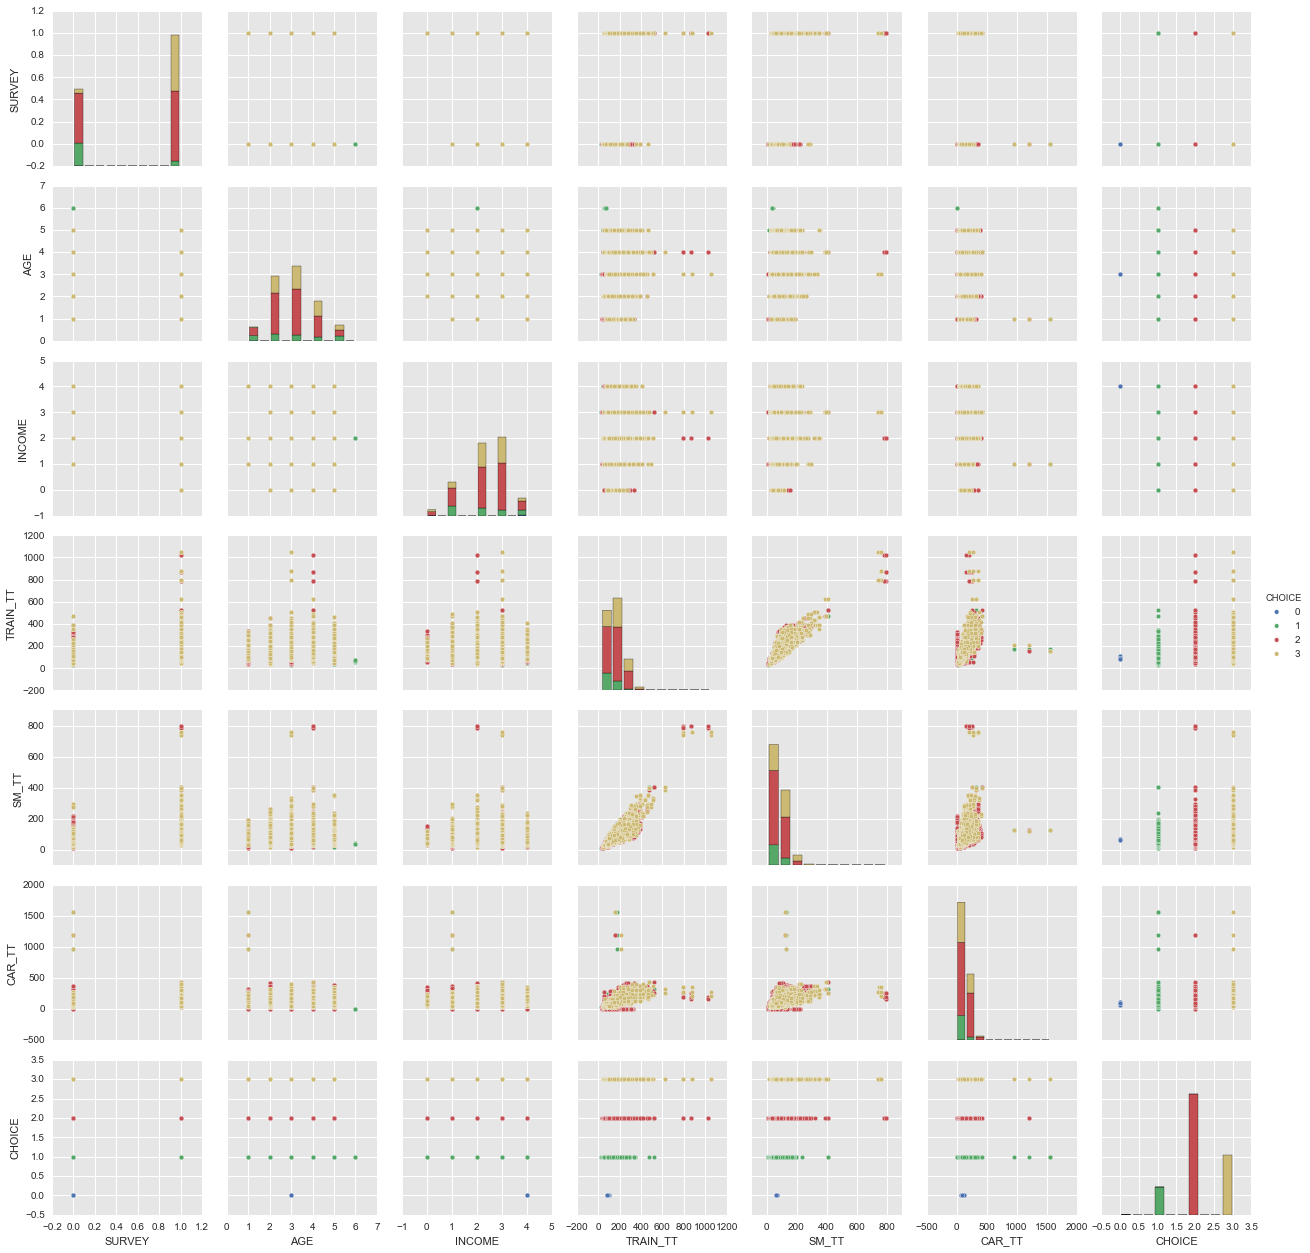

time: 14.5 s


In [32]:
sns.pairplot(df1[sc_feats], hue = 'CHOICE')

Not terribly useful, need to pick better features

The formulation of this problem is different becaue it isn't choice/no choice among a set of alternatives.  Instead, individuals are given a set of alternatives with different parameter values for each alternative, and pick one among the given.  

Could be a serious snooping problem in the RBM paper if the ID is included, but I think it is not.  THe RMB training and testing scheme is very different from what I would have picked.

Need to consult to know what the proper comparison should be.

In [33]:
len(df1)

10728

time: 4 ms


In [34]:
len(df1.columns)

24

time: 6.2 ms


In [35]:
df1.loc[7000:7010]

,SURVEY,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,MALE,INCOME,...,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE
7000,1,778,3,1,1,2,1,4,1,2,...,181,92,120,81,109,20,0,170,149,2
7001,1,778,3,1,1,2,1,4,1,2,...,200,110,30,95,146,20,0,170,149,2
7002,1,779,3,1,1,2,1,4,1,2,...,218,84,30,78,97,10,0,180,80,3
7003,1,779,3,1,1,2,1,4,1,2,...,218,84,120,70,118,10,0,234,130,3
7004,1,779,3,1,1,2,1,4,1,2,...,218,76,30,64,109,20,0,234,100,3
7005,1,779,3,1,1,2,1,4,1,2,...,166,76,60,64,109,30,0,144,130,3
7006,1,779,3,1,1,2,1,4,1,2,...,183,84,30,64,105,30,0,234,80,3
7007,1,779,3,1,1,2,1,4,1,2,...,183,76,30,70,90,10,0,144,100,3
7008,1,779,3,1,1,2,1,4,1,2,...,183,101,60,64,109,20,0,144,80,3
7009,1,779,3,1,1,2,1,4,1,2,...,218,101,30,70,118,30,0,144,130,3


time: 50.1 ms


In [36]:
split = 7002

time: 2.15 ms


split chosen to separate sessions

Note: look back here - does this split meaningfully compare to the split used within the paper?

### Feature Expansion

May want to create additional features based on comparison of prices and times

done here

In [37]:
X = df1.drop('CHOICE', axis = 1)
y = df1['CHOICE']

time: 7.86 ms


** test-train split **

In [181]:
def tt_split(X,y,split):
    # inclusive indexing necessitates subtraction
    Xtrain = X.iloc[:split-1,:]
    Xtest = X.iloc[split:,:]
    ytrain = y.iloc[:split-1]
    ytest = y.iloc[split:]
    return Xtrain, Xtest, ytrain, ytest

time: 8.52 ms


In [180]:
Xtrain, Xtest, ytrain, ytest = tt_split(X,y,split)

time: 4.81 ms


In [43]:
X.columns

Index(['SURVEY', 'ID', 'PURPOSE', 'FIRST', 'TICKET', 'WHO', 'LUGGAGE', 'AGE',
       'MALE', 'INCOME', 'GA', 'ORIGIN', 'DEST', 'CAR_AV', 'TRAIN_TT',
       'TRAIN_CO', 'TRAIN_HE', 'SM_TT', 'SM_CO', 'SM_HE', 'SM_SEATS', 'CAR_TT',
       'CAR_CO'],
      dtype='object')

time: 3.08 ms


In [44]:
X.dtypes

SURVEY      int64
ID          int64
PURPOSE     int64
FIRST       int64
TICKET      int64
WHO         int64
LUGGAGE     int64
AGE         int64
MALE        int64
INCOME      int64
GA          int64
ORIGIN      int64
DEST        int64
CAR_AV      int64
TRAIN_TT    int64
TRAIN_CO    int64
TRAIN_HE    int64
SM_TT       int64
SM_CO       int64
SM_HE       int64
SM_SEATS    int64
CAR_TT      int64
CAR_CO      int64
dtype: object

time: 12.1 ms


In [45]:
ml_feat = ['SURVEY','FIRST','LUGGAGE','AGE','MALE','INCOME','GA','CAR_AV','TRAIN_TT',
          'TRAIN_CO','TRAIN_HE','SM_TT','SM_CO','SM_HE','SM_SEATS','CAR_TT','CAR_CO']

time: 2.89 ms


In [46]:
model = ensemble.RandomForestClassifier(max_depth=17, n_estimators=300)
model.fit(Xtrain[ml_feat], ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=17, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

time: 2.16 s


In [47]:
py_x = model.predict_proba(X[ml_feat])

dy_x = model.predict(X[ml_feat])

time: 936 ms


In [48]:
sklearn.metrics.accuracy_score(dy_x, y)

0.88590604026845643

time: 9.54 ms


In [49]:
sklearn.metrics.accuracy_score(dy_x[split:], ytest)

0.67498658078368223

time: 9.19 ms


In [50]:
sklearn.metrics.log_loss(ytest, py_x[split:,1:])

0.7287114636215164

time: 15.1 ms


In [51]:
sklearn.metrics.accuracy_score(ytest, dy_x[split:])

0.67498658078368223

time: 7.39 ms


In [52]:
sklearn.metrics.accuracy_score(ytrain, dy_x[:split-1])

0.99814312241108416

time: 9.68 ms


In [53]:
sklearn.metrics.confusion_matrix(ytest, dy_x[split:])

array([[   1,  125,   19],
       [   4, 1410,  349],
       [   2,  712, 1104]])

time: 14.1 ms


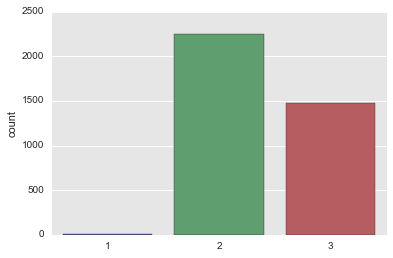

time: 191 ms


In [54]:
sns.countplot(dy_x[split:])

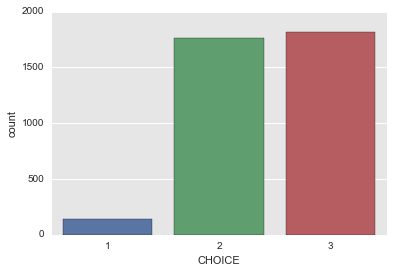

time: 331 ms


In [55]:
sns.countplot(ytest)

In [56]:
py_x

array([[ 0.        ,  0.03752196,  0.95288454,  0.00959351],
       [ 0.        ,  0.07468283,  0.91554496,  0.0097722 ],
       [ 0.        ,  0.04168061,  0.94640668,  0.01191272],
       ..., 
       [ 0.        ,  0.12660005,  0.57602472,  0.29737523],
       [ 0.        ,  0.14857744,  0.59449984,  0.25692272],
       [ 0.        ,  0.11827212,  0.71885277,  0.16287511]])

time: 6.1 ms


In [57]:
model = ensemble.RandomForestClassifier(max_depth=5, n_estimators=1000)
model.fit(Xtrain[ml_feat], ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

time: 3.48 s


In [58]:
py_x = model.predict_proba(X[ml_feat])

dy_x = model.predict(X[ml_feat])

time: 1.67 s


In [59]:
sklearn.metrics.log_loss(ytest, py_x[split:,1:])

0.80150053699029944

time: 5.42 ms


The paper may have cited a log loss score, not the RBM but the MNL choice paper; of course, not terribly useful to compare

In [60]:
sklearn.metrics.confusion_matrix(ytest, dy_x[split:])

array([[   0,  144,    1],
       [   0, 1726,   37],
       [   0, 1567,  251]])

time: 15.2 ms


In [61]:
sklearn.metrics.accuracy_score(ytest, dy_x[split:])

0.53059581320450888

time: 8.89 ms


In the informal test, deeper trees work better

In [62]:
from sklearn import ensemble
from sklearn import grid_search

time: 2.02 ms


In [63]:
params = {'max_depth': np.linspace(5,40,8)}
model = ensemble.RandomForestClassifier(n_estimators=300)
clf = grid_search.GridSearchCV(model, params)

clf.fit(Xtrain[ml_feat], ytrain)
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10.0, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

time: 36.4 s


Max depth of best is 10

In [64]:
py_x = clf.predict_proba(X[ml_feat])

dy_x = clf.predict(X[ml_feat])

time: 782 ms


In [66]:
print(sklearn.metrics.log_loss(ytest, py_x[split:,1:]))
print(sklearn.metrics.accuracy_score(ytest, dy_x[split:]))

0.719425760956
0.662372517445
time: 10.5 ms


(?) not sure about this result.  Less data to train with CV than previous.. insignificant difference in performance

In [71]:
model = ensemble.GradientBoostingClassifier()
model.fit(Xtrain[ml_feat], ytrain)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

time: 2.22 s


In [72]:
py_x = model.predict_proba(X[ml_feat])

dy_x = model.predict(X[ml_feat])

time: 102 ms


In [73]:
print(sklearn.metrics.log_loss(ytest, py_x[split:,1:]))
print(sklearn.metrics.accuracy_score(ytest, dy_x[split:]))

0.700546094752
0.682501341922
time: 7.81 ms


In [74]:
model = ensemble.AdaBoostClassifier()
model.fit(Xtrain[ml_feat], ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

time: 310 ms


In [75]:
py_x = model.predict_proba(X[ml_feat])

dy_x = model.predict(X[ml_feat])

print(sklearn.metrics.log_loss(ytest, py_x[split:,1:]))
print(sklearn.metrics.accuracy_score(ytest, dy_x[split:]))

4.91488096902
0.47128287708
time: 279 ms


May require parameter tuning

In [76]:
ml_feat = ['SURVEY','AGE','INCOME','GA','CAR_AV','TRAIN_TT',
          'TRAIN_CO','TRAIN_HE','SM_TT','SM_CO','SM_HE','CAR_TT','CAR_CO']

time: 3.33 ms


Compare the cost features

In [77]:
len(df1[df1['TRAIN_CO'] > df1['SM_CO']])

43

time: 7.07 ms


In [78]:
len(df1[df1['TRAIN_CO'] > df1['CAR_CO']])

6308

time: 7.58 ms


In [81]:
len(df1[df1['TRAIN_CO'] == df1['CAR_CO']])

87

time: 3.9 ms


(array([  9.20000000e+03,   7.00000000e+00,   1.40000000e+01,
          1.55000000e+02,   3.35000000e+02,   2.90000000e+02,
          3.04000000e+02,   1.41000000e+02,   1.38000000e+02,
          1.44000000e+02]),
 array([  4.00000000e+00,   5.07600000e+02,   1.01120000e+03,
          1.51480000e+03,   2.01840000e+03,   2.52200000e+03,
          3.02560000e+03,   3.52920000e+03,   4.03280000e+03,
          4.53640000e+03,   5.04000000e+03]),
 <a list of 10 Patch objects>)

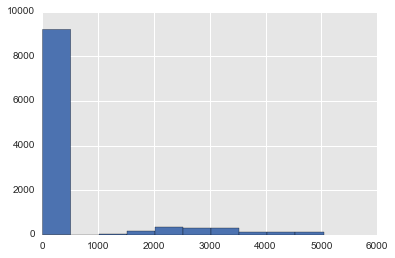

time: 334 ms


In [84]:
plt.hist(df1['TRAIN_CO'])

In [85]:
len(df1[df1['SM_CO'] > df1['CAR_CO']])

7468

time: 7.36 ms


In [87]:
len(df1[df1['SM_CO'] < df1['CAR_CO']])

3156

time: 8.35 ms


In [88]:
params = {'max_depth': np.linspace(5,40,8)}
model = ensemble.RandomForestClassifier(n_estimators=300)
clf = grid_search.GridSearchCV(model, params)

clf.fit(Xtrain[ml_feat], ytrain)
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15.0, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

time: 36.9 s


In [89]:
py_x = clf.predict_proba(X[ml_feat])
dy_x = clf.predict(X[ml_feat])
print(sklearn.metrics.log_loss(ytest, py_x[split:,1:]))
print(sklearn.metrics.accuracy_score(ytest, dy_x[split:]))

0.728427700122
0.674986580784
time: 1.01 s


In [93]:
X.columns

Index(['SURVEY', 'ID', 'PURPOSE', 'FIRST', 'TICKET', 'WHO', 'LUGGAGE', 'AGE',
       'MALE', 'INCOME', 'GA', 'ORIGIN', 'DEST', 'CAR_AV', 'TRAIN_TT',
       'TRAIN_CO', 'TRAIN_HE', 'SM_TT', 'SM_CO', 'SM_HE', 'SM_SEATS', 'CAR_TT',
       'CAR_CO'],
      dtype='object')

time: 4.12 ms


In [90]:
ml_feat = ['CAR_AV','TRAIN_TT','TRAIN_CO','TRAIN_HE','SM_TT','SM_CO','SM_HE','CAR_TT','CAR_CO']

time: 1.98 ms


In [95]:
params = {'max_depth': np.linspace(5,40,8)}
model = ensemble.RandomForestClassifier(n_estimators=300)
clf = grid_search.GridSearchCV(model, params)

clf.fit(Xtrain[ml_feat], ytrain)
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5.0, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

time: 38.4 s


In [96]:
py_x = clf.predict_proba(X[ml_feat])
dy_x = clf.predict(X[ml_feat])
print(sklearn.metrics.log_loss(ytest, py_x[split:,1:]))
print(sklearn.metrics.accuracy_score(ytest, dy_x[split:]))

0.842055170878
0.489801395598
time: 488 ms


### Need for feature engineering
Need more relative features to express the differences, the thresholds learnt probably aren't very useful.  Want -> 'ratioPrice','ratioTime' at the very least, maybe price diff

In [97]:
cost_feats = ['TRAIN_CO','SM_CO','CAR_CO']

time: 1.05 ms


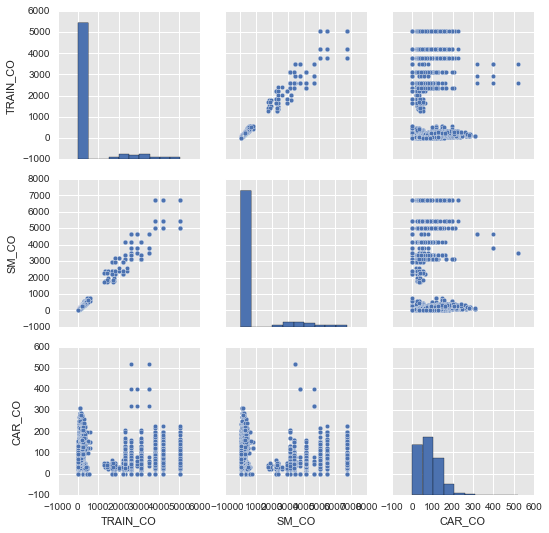

time: 2.15 s


In [98]:
sns.pairplot(df1[cost_feats])

The cost features are zero -- unwritten for most train examples?  This is disappointing...

Not quite, just very small

(array([  9.20000000e+03,   7.00000000e+00,   1.40000000e+01,
          1.55000000e+02,   3.35000000e+02,   2.90000000e+02,
          3.04000000e+02,   1.41000000e+02,   1.38000000e+02,
          1.44000000e+02]),
 array([  4.00000000e+00,   5.07600000e+02,   1.01120000e+03,
          1.51480000e+03,   2.01840000e+03,   2.52200000e+03,
          3.02560000e+03,   3.52920000e+03,   4.03280000e+03,
          4.53640000e+03,   5.04000000e+03]),
 <a list of 10 Patch objects>)

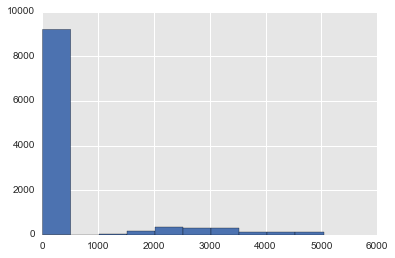

time: 269 ms


In [99]:
plt.hist(df1['TRAIN_CO'])

(array([  9.20000000e+03,   7.00000000e+00,   1.40000000e+01,
          1.55000000e+02,   3.35000000e+02,   2.90000000e+02,
          3.04000000e+02,   1.41000000e+02,   1.38000000e+02,
          1.44000000e+02]),
 array([  4.00000000e+00,   5.07600000e+02,   1.01120000e+03,
          1.51480000e+03,   2.01840000e+03,   2.52200000e+03,
          3.02560000e+03,   3.52920000e+03,   4.03280000e+03,
          4.53640000e+03,   5.04000000e+03]),
 <a list of 10 Patch objects>)

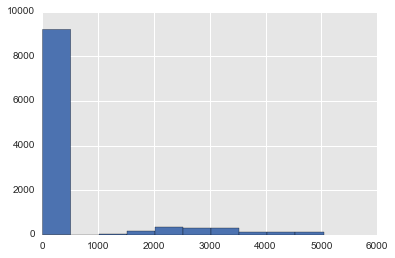

time: 261 ms


In [100]:
plt.hist(df1[df1['TRAIN_CO']>0]['TRAIN_CO'])

(array([ 118.,  324.,  475.,  567.,  784.,  698.,  676.,  708.,  750.,  655.]),
 array([  4. ,  13.5,  23. ,  32.5,  42. ,  51.5,  61. ,  70.5,  80. ,
         89.5,  99. ]),
 <a list of 10 Patch objects>)

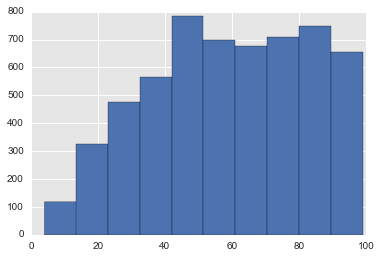

time: 246 ms


In [101]:
plt.hist(df1[df1['TRAIN_CO']<100]['TRAIN_CO'])

(array([ 1689.,    78.,   275.,   395.,   786.,   747.,   762.,   696.,
          903.,   752.]),
 array([  0. ,   9.7,  19.4,  29.1,  38.8,  48.5,  58.2,  67.9,  77.6,
         87.3,  97. ]),
 <a list of 10 Patch objects>)

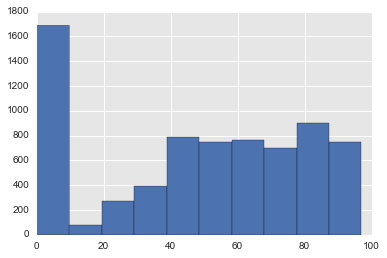

time: 289 ms


In [102]:
plt.hist(df1[df1['CAR_CO']<100]['CAR_CO'])

(array([  3.37400000e+03,   3.93000000e+03,   2.46600000e+03,
          7.58000000e+02,   1.54000000e+02,   3.30000000e+01,
          7.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([   0.,   52.,  104.,  156.,  208.,  260.,  312.,  364.,  416.,
         468.,  520.]),
 <a list of 10 Patch objects>)

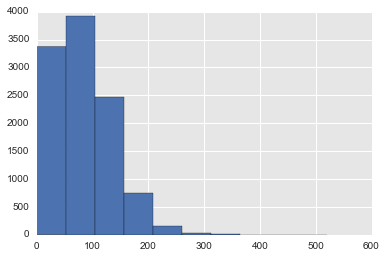

time: 261 ms


In [103]:
plt.hist(df1['CAR_CO'])

So our conclusion should be that there are some very high-cost train trips

(array([  9.20200000e+03,   5.00000000e+00,   1.00000000e+01,
          1.57000000e+02,   3.26000000e+02,   3.15000000e+02,
          2.90000000e+02,   1.40000000e+02,   1.43000000e+02,
          1.40000000e+02]),
 array([  6.00000000e+00,   6.77400000e+02,   1.34880000e+03,
          2.02020000e+03,   2.69160000e+03,   3.36300000e+03,
          4.03440000e+03,   4.70580000e+03,   5.37720000e+03,
          6.04860000e+03,   6.72000000e+03]),
 <a list of 10 Patch objects>)

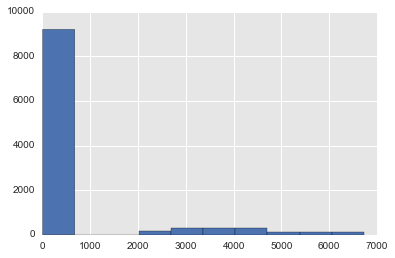

time: 248 ms


In [104]:
plt.hist(df1['SM_CO'])

(array([ 1837.,  3023.,  2200.,   966.,   532.,   394.,   117.,    76.,
           23.,    11.]),
 array([   6. ,   55.2,  104.4,  153.6,  202.8,  252. ,  301.2,  350.4,
         399.6,  448.8,  498. ]),
 <a list of 10 Patch objects>)

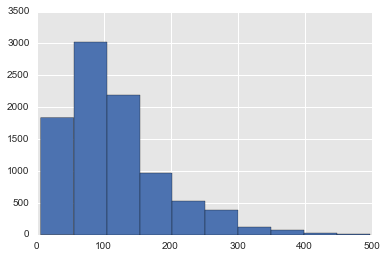

time: 254 ms


In [105]:
plt.hist(df1[df1['SM_CO']<500]['SM_CO'])

(array([  83.,  201.,  333.,  467.,  577.,  470.,  689.,  564.,  569.,  801.]),
 array([  6. ,  15.3,  24.6,  33.9,  43.2,  52.5,  61.8,  71.1,  80.4,
         89.7,  99. ]),
 <a list of 10 Patch objects>)

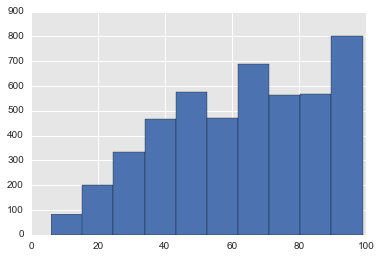

time: 248 ms


In [106]:
plt.hist(df1[df1['SM_CO']<100]['SM_CO'])

Find the minimum cost available in each session

In [114]:
x =df1.loc[:,['SM_CO','TRAIN_CO','CAR_CO']].min(axis=1)

time: 5.95 ms


As written here, not robust to zero values

(array([  4.45900000e+03,   4.24400000e+03,   1.67800000e+03,
          2.84000000e+02,   5.30000000e+01,   1.00000000e+00,
          3.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([   0.,   52.,  104.,  156.,  208.,  260.,  312.,  364.,  416.,
         468.,  520.]),
 <a list of 10 Patch objects>)

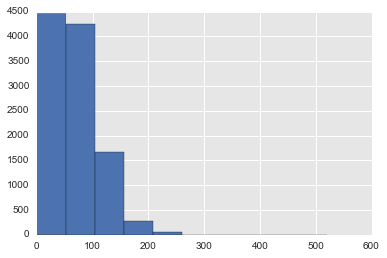

time: 258 ms


In [115]:
plt.hist(x)

(array([ 1683.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9045.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

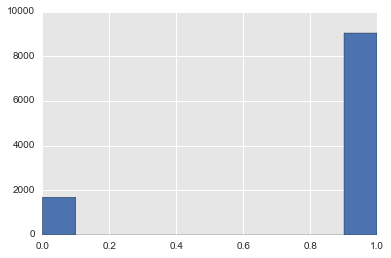

time: 255 ms


In [116]:
plt.hist(x>0)

1683 have their min = 0 

Could it be the car cost?

In [117]:
x = np.asarray(df1.loc[:,['SM_CO','TRAIN_CO','CAR_CO']].min(axis=1) ==0)

time: 10.4 ms


In [118]:
x

array([False, False, False, ..., False, False, False], dtype=bool)

time: 5.84 ms


In [119]:
df1[np.asarray(x)]['CAR_AV'].value_counts()

0    1683
Name: CAR_AV, dtype: int64

time: 10.2 ms


Yes, with high confidence, if the min is zero, it is the null car cost

In [122]:
df1['CAR_AV'].value_counts()

1    9045
0    1683
Name: CAR_AV, dtype: int64

time: 7.86 ms


In [123]:
x = df1.loc[:,['SM_CO','TRAIN_CO','CAR_CO']]

time: 3.82 ms


May want to create a 2-part model given car availability -- but should the trees not learn that?

In [124]:
def calc_valid_min(df):
    x = df1.loc[:,['SM_CO','TRAIN_CO','CAR_CO']].min(axis=1)
    for i in range(len(x)):
        if x[i]==0:
            x[i] = min(df1.loc[i,['SM_CO', 'TRAIN_CO']])
    return x            

time: 5.25 ms


In [125]:
x1 = calc_valid_min(df1)

time: 1.38 s


(array([  9.95800000e+03,   5.00000000e+00,   0.00000000e+00,
          1.20000000e+02,   1.92000000e+02,   1.48000000e+02,
          1.61000000e+02,   4.80000000e+01,   4.60000000e+01,
          5.00000000e+01]),
 array([  4.00000000e+00,   5.07600000e+02,   1.01120000e+03,
          1.51480000e+03,   2.01840000e+03,   2.52200000e+03,
          3.02560000e+03,   3.52920000e+03,   4.03280000e+03,
          4.53640000e+03,   5.04000000e+03]),
 <a list of 10 Patch objects>)

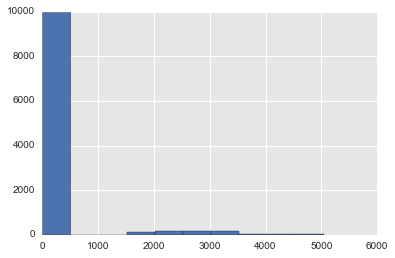

time: 268 ms


In [126]:
plt.hist(x1)

(array([  141.,   405.,   791.,   843.,  1067.,  1077.,   885.,   774.,
          862.,   696.]),
 array([  4. ,  13.5,  23. ,  32.5,  42. ,  51.5,  61. ,  70.5,  80. ,
         89.5,  99. ]),
 <a list of 10 Patch objects>)

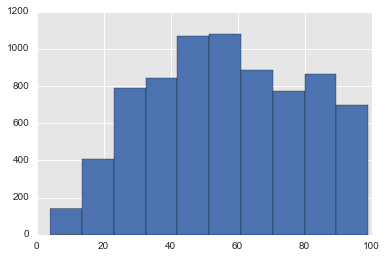

time: 251 ms


In [127]:
plt.hist(x1[x1<100])

In [128]:
df1.loc[x1>1000, ['TRAIN_CO','SM_CO','CAR_CO']]

,TRAIN_CO,SM_CO,CAR_CO
288,3120,3380,0
289,3120,4160,0
290,3120,3120,0
291,2600,4160,0
292,2340,3120,0
293,2340,4160,0
294,3120,4160,0
295,2600,3380,0
296,2340,3380,0
297,2600,3120,0


time: 31.5 ms


It is conceivably correct that those could have minima over 1000

Are there any probability predicted for car choice when car is not available?  Probably!  Could do a transofrm 

In [131]:
df2 = df1[df1['CHOICE']!=0]

time: 4.86 ms


In [132]:
df_tren = df2[df2['CHOICE'] !=3]

time: 3.69 ms


In [133]:
df_car = copy.deepcopy(df2)

time: 3.12 ms


In [134]:
df_car['CHOICE'] = np.asarray(df_car['CHOICE'] ==3)

time: 4.02 ms


In [135]:
df_tren['CHOICE'] = np.asarray(df_tren['CHOICE'] ==1)

time: 205 ms


/home/atproofer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Choice == 1 represents that the choice is train, 0 represents choice is SM

In [136]:
df2.columns

Index(['SURVEY', 'ID', 'PURPOSE', 'FIRST', 'TICKET', 'WHO', 'LUGGAGE', 'AGE',
       'MALE', 'INCOME', 'GA', 'ORIGIN', 'DEST', 'CAR_AV', 'TRAIN_TT',
       'TRAIN_CO', 'TRAIN_HE', 'SM_TT', 'SM_CO', 'SM_HE', 'SM_SEATS', 'CAR_TT',
       'CAR_CO', 'CHOICE'],
      dtype='object')

time: 5.02 ms


In [137]:
x1

0        48
1        48
2        48
3        40
4        36
5        36
6        48
7        36
8        40
9        62
10       62
11       62
12       52
13       47
14       47
15       62
16       47
17       52
18       32
19       29
20       32
21       29
22       32
23       38
24       29
25       32
26       38
27       40
28       40
29       36
         ..
10698    23
10699    19
10700    23
10701    19
10702    19
10703    17
10704    17
10705    19
10706    17
10707    23
10708    23
10709    19
10710    19
10711    19
10712    17
10713    17
10714    19
10715    17
10716    23
10717    23
10718    19
10719    13
10720    13
10721    12
10722    12
10723    13
10724    12
10725    16
10726    16
10727    13
dtype: int64

time: 12.2 ms


In [138]:
len(x1)

10728

time: 5.03 ms


In [139]:
len(df2)

10719

time: 3.58 ms


In [140]:
df2['min_CO'] = x1

time: 210 ms


/home/atproofer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [141]:
df2.columns

Index(['SURVEY', 'ID', 'PURPOSE', 'FIRST', 'TICKET', 'WHO', 'LUGGAGE', 'AGE',
       'MALE', 'INCOME', 'GA', 'ORIGIN', 'DEST', 'CAR_AV', 'TRAIN_TT',
       'TRAIN_CO', 'TRAIN_HE', 'SM_TT', 'SM_CO', 'SM_HE', 'SM_SEATS', 'CAR_TT',
       'CAR_CO', 'CHOICE', 'min_CO'],
      dtype='object')

time: 7.44 ms


In [142]:
x1

0        48
1        48
2        48
3        40
4        36
5        36
6        48
7        36
8        40
9        62
10       62
11       62
12       52
13       47
14       47
15       62
16       47
17       52
18       32
19       29
20       32
21       29
22       32
23       38
24       29
25       32
26       38
27       40
28       40
29       36
         ..
10698    23
10699    19
10700    23
10701    19
10702    19
10703    17
10704    17
10705    19
10706    17
10707    23
10708    23
10709    19
10710    19
10711    19
10712    17
10713    17
10714    19
10715    17
10716    23
10717    23
10718    19
10719    13
10720    13
10721    12
10722    12
10723    13
10724    12
10725    16
10726    16
10727    13
dtype: int64

time: 9.39 ms


In [143]:
df2['min_CO']

0        48
1        48
2        48
3        40
4        36
5        36
6        48
7        36
8        40
9        62
10       62
11       62
12       52
13       47
14       47
15       62
16       47
17       52
18       32
19       29
20       32
21       29
22       32
23       38
24       29
25       32
26       38
27       40
28       40
29       36
         ..
10698    23
10699    19
10700    23
10701    19
10702    19
10703    17
10704    17
10705    19
10706    17
10707    23
10708    23
10709    19
10710    19
10711    19
10712    17
10713    17
10714    19
10715    17
10716    23
10717    23
10718    19
10719    13
10720    13
10721    12
10722    12
10723    13
10724    12
10725    16
10726    16
10727    13
Name: min_CO, dtype: int64

time: 11.4 ms


In [144]:
len(df2)

10719

time: 4.58 ms


did it actually do index matching?

In [145]:
df1[df1['CHOICE'] == 0]

,SURVEY,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,MALE,INCOME,...,TRAIN_TT,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE
1782,0,199,2,1,6,1,1,3,0,4,...,106,5040,120,64,5040,30,1,90,50,0
1783,0,199,2,1,6,1,1,3,0,4,...,106,3780,120,68,5460,20,1,72,40,0
1784,0,199,2,1,6,1,1,3,0,4,...,82,3780,120,66,5040,30,0,117,40,0
1785,0,199,2,1,6,1,1,3,0,4,...,90,3780,60,68,5460,10,0,117,65,0
1786,0,199,2,1,6,1,1,3,0,4,...,90,4200,120,68,5040,30,0,72,65,0
1787,0,199,2,1,6,1,1,3,0,4,...,82,5040,60,66,5460,10,1,90,40,0
1788,0,199,2,1,6,1,1,3,0,4,...,82,4200,60,68,5040,20,1,117,50,0
1789,0,199,2,1,6,1,1,3,0,4,...,90,5040,30,68,6720,20,1,90,65,0
1790,0,199,2,1,6,1,1,3,0,4,...,82,4200,120,64,5460,20,0,90,65,0


time: 60.7 ms


In [146]:
df2[df2['CHOICE'] == 0]

,SURVEY,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,MALE,INCOME,...,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE,min_CO


time: 22 ms


In [147]:
df2.loc[1780:1800]

,SURVEY,ID,PURPOSE,FIRST,TICKET,WHO,LUGGAGE,AGE,MALE,INCOME,...,TRAIN_CO,TRAIN_HE,SM_TT,SM_CO,SM_HE,SM_SEATS,CAR_TT,CAR_CO,CHOICE,min_CO
1780,0,198,2,1,6,1,1,2,1,2,...,5040,30,45,5460,30,0,72,65,2,65
1781,0,198,2,1,6,1,1,2,1,2,...,4200,60,45,6720,30,0,90,50,2,50
1791,0,200,2,1,6,1,1,3,1,2,...,5040,120,31,5040,30,1,0,0,2,5040
1792,0,200,2,1,6,1,1,3,1,2,...,3780,120,34,5040,30,0,0,0,2,3780
1793,0,200,2,1,6,1,1,3,1,2,...,3780,120,38,5460,20,1,0,0,2,3780
1794,0,200,2,1,6,1,1,3,1,2,...,3780,60,38,5460,10,0,0,0,1,3780
1795,0,200,2,1,6,1,1,3,1,2,...,4200,120,38,5040,30,0,0,0,2,4200
1796,0,200,2,1,6,1,1,3,1,2,...,4200,60,38,5040,20,1,0,0,2,4200
1797,0,200,2,1,6,1,1,3,1,2,...,5040,60,34,5460,10,1,0,0,2,5040
1798,0,200,2,1,6,1,1,3,1,2,...,4200,120,31,5460,20,0,0,0,2,4200


time: 59.6 ms


Really don't know about some of these price feats

In [148]:
ratio_price_feats = ['ratio_TRAIN_CO','ratio_SM_CO','ratio_CAR_CO']

time: 1.47 ms


In [149]:
df2['ratio_TRAIN_CO'] = df2['TRAIN_CO']/df2['min_CO']

df2['ratio_SM_CO'] = df2['SM_CO']/df2['min_CO']
df2['ratio_CAR_CO'] = df2['CAR_CO']/df2['min_CO']

/home/atproofer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/atproofer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


time: 689 ms


/home/atproofer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(array([  9.78200000e+03,   7.80000000e+02,   7.80000000e+01,
          4.10000000e+01,   2.00000000e+01,   8.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          3.00000000e+00]),
 array([  0.  ,   1.95,   3.9 ,   5.85,   7.8 ,   9.75,  11.7 ,  13.65,
         15.6 ,  17.55,  19.5 ]),
 <a list of 10 Patch objects>)

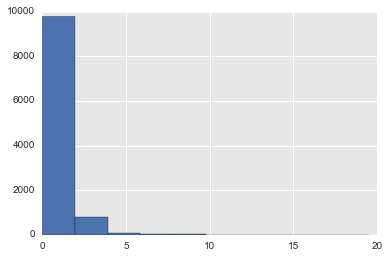

time: 259 ms


In [150]:
plt.hist(df2['ratio_CAR_CO'])

(array([  1.68300000e+03,   0.00000000e+00,   6.93300000e+03,
          1.57000000e+03,   3.49000000e+02,   8.30000000e+01,
          5.80000000e+01,   2.70000000e+01,   1.10000000e+01,
          5.00000000e+00]),
 array([ 0.        ,  0.30204249,  0.60408498,  0.90612747,  1.20816995,
         1.51021244,  1.81225493,  2.11429742,  2.41633991,  2.7183824 ,
         3.02042489]),
 <a list of 10 Patch objects>)

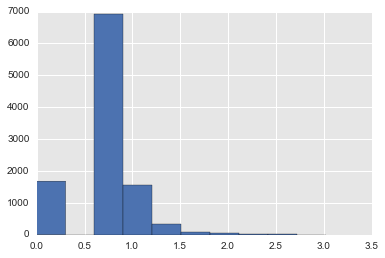

time: 241 ms


In [151]:
plt.hist(np.log(df2['ratio_CAR_CO']+1))

(array([ 9460.,   359.,   107.,    50.,    61.,   163.,   263.,   183.,
           57.,    16.]),
 array([ 0.69314718,  1.19845278,  1.70375838,  2.20906398,  2.71436958,
         3.21967519,  3.72498079,  4.23028639,  4.73559199,  5.24089759,
         5.74620319]),
 <a list of 10 Patch objects>)

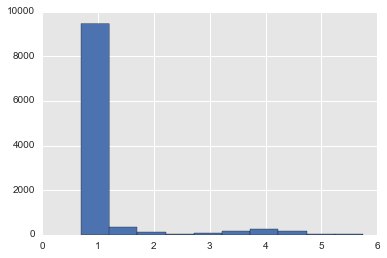

time: 270 ms


In [152]:
plt.hist(np.log(df2['ratio_TRAIN_CO']+1))

(array([ 9184.,   608.,    91.,    83.,    44.,   142.,   268.,   210.,
           75.,    14.]),
 array([ 0.69314718,  1.22714108,  1.76113499,  2.29512889,  2.8291228 ,
         3.3631167 ,  3.89711061,  4.43110451,  4.96509841,  5.49909232,
         6.03308622]),
 <a list of 10 Patch objects>)

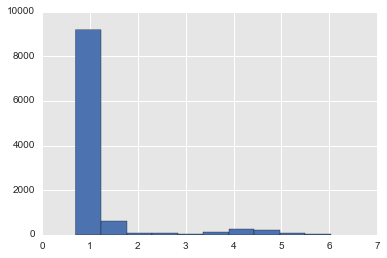

time: 225 ms


In [153]:
plt.hist(np.log(df2['ratio_SM_CO']+1))

(array([  1.01030000e+04,   3.26000000e+02,   1.62000000e+02,
          6.80000000e+01,   2.90000000e+01,   1.70000000e+01,
          7.00000000e+00,   0.00000000e+00,   4.00000000e+00,
          3.00000000e+00]),
 array([   1. ,   42.5,   84. ,  125.5,  167. ,  208.5,  250. ,  291.5,
         333. ,  374.5,  416. ]),
 <a list of 10 Patch objects>)

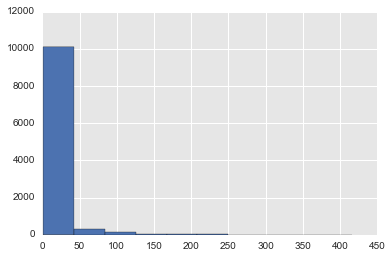

time: 260 ms


In [154]:
plt.hist(df2['ratio_SM_CO'])

In [155]:
df2[ratio_price_feats].describe()

,ratio_TRAIN_CO,ratio_SM_CO,ratio_CAR_CO
count,10719.000000,10719.000000,10719.000000
mean,5.696576,7.469258,1.150410
std,19.308171,25.977183,0.982654
min,1.000000,1.000000,0.000000
25%,1.000000,1.176471,1.000000
50%,1.000000,1.333333,1.000000
75%,1.421053,1.765152,1.315789
max,312.000000,416.000000,19.500000


time: 41.7 ms


In [156]:
def calc_valid_min2(df):
    x = df1.loc[:,['SM_TT','TRAIN_TT','CAR_TT']].min(axis=1)
    for i in range(len(x)):
        if x[i]==0:
            x[i] = min(df1.loc[i,['SM_TT', 'TRAIN_TT']])
    return x            

time: 9.57 ms


In [157]:
x2 = calc_valid_min2(df2)

time: 1.39 s


In [158]:
df2['min_TT'] = x2

time: 220 ms


/home/atproofer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [159]:
df2['ratio_TRAIN_TT'] = df2['TRAIN_TT']/df2['min_TT']
df2['ratio_SM_TT'] = df2['SM_TT']/df2['min_TT']
df2['ratio_CAR_TT'] = df2['CAR_TT']/df2['min_TT']

time: 575 ms


/home/atproofer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/atproofer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/atproofer/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [160]:
X = df2.drop(['CHOICE'],axis=1)
y = df2['CHOICE']
Xtrain, Xtest, ytrain, ytest = tt_split(X,y,split)

time: 8.82 ms


In [161]:
df2.loc[7000:7010,'ID']

7000    778
7001    778
7002    779
7003    779
7004    779
7005    779
7006    779
7007    779
7008    779
7009    779
7010    779
Name: ID, dtype: int64

time: 10.1 ms


split is not defined absolutely but based on index

In [162]:
ratio_feats = ratio_price_feats + ['ratio_TRAIN_TT','ratio_SM_TT','ratio_CAR_TT']

time: 2.99 ms


In [163]:
ml_feat = ['SURVEY','FIRST','LUGGAGE','AGE','MALE','INCOME','GA','CAR_AV','TRAIN_TT',
          'TRAIN_CO','TRAIN_HE','SM_TT','SM_CO','SM_HE','SM_SEATS','CAR_TT','CAR_CO'] + ratio_feats
          

time: 3.78 ms


In [164]:
params = {'max_depth': np.linspace(5,40,8)}
model = ensemble.RandomForestClassifier(n_estimators=300)
clf = grid_search.GridSearchCV(model, params)

clf.fit(Xtrain[ml_feat], ytrain)
print(clf.best_estimator_)

py_x = clf.predict_proba(X[ml_feat])
dy_x = clf.predict(X[ml_feat])
print(sklearn.metrics.log_loss(ytest, py_x[split:]))
print(sklearn.metrics.accuracy_score(ytest, dy_x[split:]))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5.0, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.752305942772
0.634382566586
time: 43.5 s


In [165]:
print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5.0, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
time: 3.59 ms


How does it find that the best estimator has depth = 5?

In [166]:
model = ensemble.RandomForestClassifier(max_depth = 15, n_estimators=300)

model.fit(Xtrain[ml_feat], ytrain)

py_x = model.predict_proba(X[ml_feat])
dy_x = model.predict(X[ml_feat])
print(sklearn.metrics.log_loss(ytest, py_x[split:]))
print(sklearn.metrics.accuracy_score(ytest, dy_x[split:]))

0.702412421415
0.684422921711
time: 3.28 s


In [167]:
model = ensemble.RandomForestClassifier(max_depth = 25, n_estimators=300)

model.fit(Xtrain[ml_feat], ytrain)

py_x = model.predict_proba(X[ml_feat])
dy_x = model.predict(X[ml_feat])
print(sklearn.metrics.log_loss(ytest, py_x[split:]))
print(sklearn.metrics.accuracy_score(ytest, dy_x[split:]))

0.72771851716
0.684691955878
time: 3.46 s


In [168]:
print(sklearn.metrics.log_loss(ytest, py_x[split:]))
print(sklearn.metrics.log_loss(y, py_x)*len(y))
print(sklearn.metrics.accuracy_score(ytest, dy_x[split:]))

0.72771851716
3680.93390089
0.684691955878
time: 18.5 ms


In [169]:
print(sklearn.metrics.log_loss(y, py_x)*len(y))

3680.93390089
time: 15.3 ms


In [171]:
len(py_x[split:])

3717

time: 5.06 ms


In [172]:
print(sklearn.metrics.log_loss(y, py_x))

0.343402733547
time: 16.3 ms


In [268]:
a = py_x.shape

time: 4.64 ms


In [269]:
a

(10719, 3)

time: 11 ms


In [284]:
b = np.zeros(a)

time: 9.2 ms


In [286]:
print(sklearn.metrics.log_loss(y, b))

1.09861228867
time: 20.6 ms


In [285]:
print(sklearn.metrics.log_loss(y, b)*len(y))

11776.0251222
time: 27.1 ms


In [278]:
b[:,1] = 1

time: 7.96 ms


In [280]:
print(sklearn.metrics.log_loss(y, b)*len(y))

155528.110106
time: 28.6 ms


In [283]:
np.log(0.01)

-4.6051701859880909

time: 18.3 ms


In [275]:
b[:,2] = 1

time: 2.22 ms


In [276]:
print(sklearn.metrics.log_loss(y, b))

5.27833971811
time: 36.2 ms


In [273]:
b

array([[ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

time: 13.2 ms


In [173]:
py_x

array([[ 0.02436508,  0.97206349,  0.00357143],
       [ 0.03055556,  0.96944444,  0.        ],
       [ 0.02722222,  0.97277778,  0.        ],
       ..., 
       [ 0.08666667,  0.69      ,  0.22333333],
       [ 0.09      ,  0.68666667,  0.22333333],
       [ 0.26      ,  0.54666667,  0.19333333]])

time: 9.44 ms


In [174]:
sklearn.metrics.confusion_matrix(ytest, dy_x[split:])

array([[   1,  124,   20],
       [   3, 1399,  361],
       [   5,  659, 1145]])

time: 6.75 ms


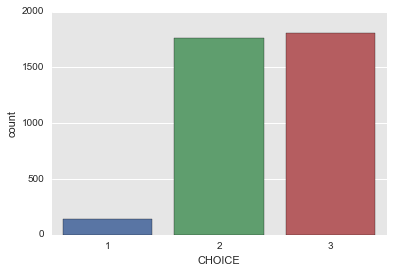

time: 214 ms


In [175]:
sns.countplot(ytest)

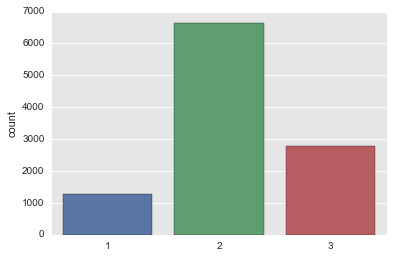

time: 231 ms


In [176]:
sns.countplot(dy_x)

A confusion matrix C := C_i,j = True i, Pred j

It is slightly better than before.  The pattern in the decision matrix looks about the same.  Surprising that it did not make a bigger difference.  

May want to convert either to multipart model with hard-coded split 

Really can't find when train is predicted, and biggest confusion is between SM and car

quite possible that we are predicting car even when unavailable